In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
#from vis_utils import *
import random;
import math;
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['labeled-test-data', 'labeled-dataset', 'ahdd1']


In [ ]:
#data = pd.read_csv("../input/labeled-dataset/csvTrainImagesWLabels.csv", header=None) 
#data.head()

In [ ]:
#from https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5

In [ ]:
print(torch.__version__)
!python --version

In [5]:
class Dataset(object):
    """An abstract class representing a Dataset.
    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

In [6]:
class ArabicDataset(Dataset):
    
    def __init__(self, file_path, transform=None):
        self.data = pd.read_csv(file_path)
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # load image as ndarray type (Height * Width * Channels)
        # be carefull for converting dtype to np.uint8 [Unsigned integer (0 to 255)]
        # in this example, i don't use ToTensor() method of torchvision.transforms
        # so you can convert numpy ndarray shape to tensor in PyTorch (H, W, C) --> (C, H, W)
        image = self.data.iloc[index, 1:].values.astype(np.uint8).reshape((1, 28, 28))
        label = self.data.iloc[index, 0]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [8]:
#train_dataset = pd.read_csv('../input/csvTrainImages 60k x 784.csv')
train_dataset = ArabicDataset('../input/labeled-dataset/csvTrainImagesWLabels.csv', transform=None)
test_dataset = ArabicDataset('../input/labeled-test-data/csvTestImagesWLabels.csv', transform=None)

In [12]:
train_dataset.__getitem__(0)
test_dataset.__getitem__(0)

(array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
     

In [ ]:
#train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
#test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
#                                          batch_size=batch_size,
#                                          shuffle=True);

In [ ]:
#train_iter = iter(train_loader)
#print(type(train_iter))

In [ ]:
#images, labels = train_iter.next()

#print('images shape on batch size = {}'.format(images.size()))
#print('labels shape on batch size = {}'.format(labels.size()))

In [ ]:
# make grid takes tensor as arg
# tensor : (batchsize, channels, height, width)
#grid = torchvision.utils.make_grid(images)

#plt.imshow(grid.numpy().transpose((1, 2, 0)))
#plt.axis('off')
#plt.title(labels.numpy());

In [ ]:
class NeuralNet(nn.Module):
    """A Neural Network with a hidden layer"""
    def __init__(self, input_size,hidden_size,output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        return output

In [ ]:
input_size = 784
hidden_size = 500
output_size = 10
num_epochs = 3

learning_rate = 0.001

model = NeuralNet(input_size,hidden_size, output_size)

lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #images = images.reshape(-1,28*28)
        #show_batch(images)
        out = model(images)
        loss = lossFunction(out,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


In [14]:
num_epochs = 5;
batch_size = 100;
learning_rate = 0.001;

In [15]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True);

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True);

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [17]:
#instance of the Conv Net
cnn = CNN();
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);

In [18]:
losses = [];
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item());
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))

Epoch : 1/5, Iter : 100/599,  Loss: 0.1165
Epoch : 1/5, Iter : 200/599,  Loss: 0.0171
Epoch : 1/5, Iter : 300/599,  Loss: 0.0205
Epoch : 1/5, Iter : 400/599,  Loss: 0.0411
Epoch : 1/5, Iter : 500/599,  Loss: 0.0248
Epoch : 1/5, Iter : 600/599,  Loss: 0.1063
Epoch : 2/5, Iter : 100/599,  Loss: 0.0112
Epoch : 2/5, Iter : 200/599,  Loss: 0.0086
Epoch : 2/5, Iter : 300/599,  Loss: 0.0075
Epoch : 2/5, Iter : 400/599,  Loss: 0.0375
Epoch : 2/5, Iter : 500/599,  Loss: 0.0147
Epoch : 2/5, Iter : 600/599,  Loss: 0.0304
Epoch : 3/5, Iter : 100/599,  Loss: 0.0055
Epoch : 3/5, Iter : 200/599,  Loss: 0.0059
Epoch : 3/5, Iter : 300/599,  Loss: 0.0009
Epoch : 3/5, Iter : 400/599,  Loss: 0.0008
Epoch : 3/5, Iter : 500/599,  Loss: 0.0233
Epoch : 3/5, Iter : 600/599,  Loss: 0.0047
Epoch : 4/5, Iter : 100/599,  Loss: 0.0059
Epoch : 4/5, Iter : 200/599,  Loss: 0.0224
Epoch : 4/5, Iter : 300/599,  Loss: 0.0027
Epoch : 4/5, Iter : 400/599,  Loss: 0.0121
Epoch : 4/5, Iter : 500/599,  Loss: 0.0317
Epoch : 4/5

In [19]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 99.0000 %


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


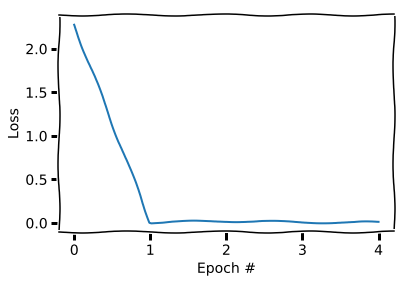

In [21]:
losses_in_epochs = losses[0::600]
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses_in_epochs);
plt.show();

<Figure size 432x288 with 0 Axes>

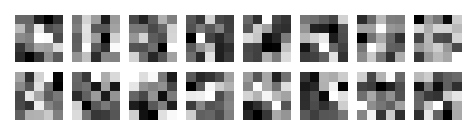

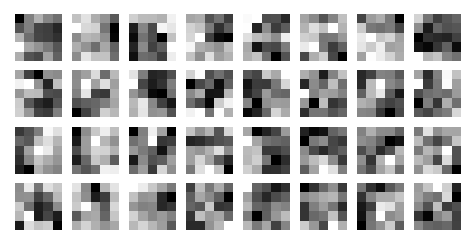

In [23]:
def plot_kernels(tensor, num_cols=6):
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(num_kernels):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i][0,:,:], cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
filters = cnn.modules();
model_layers = [i for i in cnn.children()];
first_layer = model_layers[0];
second_layer = model_layers[1];
first_kernels = first_layer[0].weight.data.numpy()
plot_kernels(first_kernels, 8)
second_kernels = second_layer[0].weight.data.numpy()
plot_kernels(second_kernels, 8)